In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data cleaning



In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Py4EconWeek-LSE/Course-material/main/Happiness%20and%20GDP/happiness_with_continent(2019).csv')
df1.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [3]:
df2 = pd.read_csv('https://www.dropbox.com/s/4s5kg4qse26y8s8/2020.csv?dl=1')
df2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [4]:
df1.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [5]:
df2.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
columns_2019 = ['Country name', 'Year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df2019 = df1.loc[:, columns_2019]
df2019.rename(columns = {'Life Ladder' : 'Ladder score', 'Log GDP per capita' : 'Logged GDP per capita', 
                         'Healthy life expectancy at birth' : 'Healthy life expectancy'}, inplace = True)
df2019.head()

,Country name,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620


In [7]:
columns_2020 = ['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df2020 = df2.loc[:, columns_2020]
df2020.insert(1, 'Year', 2020, True)
df2020.head()

,Country name,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2020,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,2020,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,2020,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,2020,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,2020,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [8]:
df_merge = df2019.append(df2020)
df_merge.sort_values('Country name')
print(len(df2019))
print(len(df2020))
print(len(df_merge))

1704
153
1857


In [9]:
unique_countries_2019 = df1['Country name'].unique()
continent_dictionary = {}

for country in unique_countries_2019:
  continent = df1[df1['Country name'] == country]['Continent'].iloc[0]
  continent_dictionary[country] = continent

print(continent_dictionary)

{'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia', 'Bangladesh': 'Asia', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa', 'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominican Republic': 

In [10]:
unique_countries_2020 = df2['Country name'].unique()
region_dictionary = {}

for country in unique_countries_2020:
  region = df2[df2['Country name'] == country]['Regional indicator'].iloc[0]
  region_dictionary[country] = region

print(region_dictionary)

{'Finland': 'Western Europe', 'Denmark': 'Western Europe', 'Switzerland': 'Western Europe', 'Iceland': 'Western Europe', 'Norway': 'Western Europe', 'Netherlands': 'Western Europe', 'Sweden': 'Western Europe', 'New Zealand': 'North America and ANZ', 'Austria': 'Western Europe', 'Luxembourg': 'Western Europe', 'Canada': 'North America and ANZ', 'Australia': 'North America and ANZ', 'United Kingdom': 'Western Europe', 'Israel': 'Middle East and North Africa', 'Costa Rica': 'Latin America and Caribbean', 'Ireland': 'Western Europe', 'Germany': 'Western Europe', 'United States': 'North America and ANZ', 'Czech Republic': 'Central and Eastern Europe', 'Belgium': 'Western Europe', 'United Arab Emirates': 'Middle East and North Africa', 'Malta': 'Western Europe', 'France': 'Western Europe', 'Mexico': 'Latin America and Caribbean', 'Taiwan Province of China': 'East Asia', 'Uruguay': 'Latin America and Caribbean', 'Saudi Arabia': 'Middle East and North Africa', 'Spain': 'Western Europe', 'Guate

In [11]:
df_merge['Continent'] = df_merge['Country name'].map(continent_dictionary)
df_merge['Regional indicator'] = df_merge['Country name'].map(region_dictionary)
df_merge.sort_values('Country name')
df_merge.head(20)

,Country name,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Regional indicator
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,Asia,South Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,Asia,South Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,Asia,South Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,Asia,South Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,Asia,South Asia
5,Afghanistan,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,Asia,South Asia
6,Afghanistan,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,Asia,South Asia
7,Afghanistan,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,Asia,South Asia
8,Afghanistan,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,Asia,South Asia
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,Asia,South Asia


In [12]:
df_merge.to_csv('df_merge.csv')

# South America analysis

In [13]:
south_america = df_merge[df_merge['Continent'] == 'South America']
south_america.head()

,Country name,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Regional indicator
33,Argentina,2006,6.312925,9.716692,0.938463,66.820000,0.733004,-0.152618,0.851799,South America,Latin America and Caribbean
34,Argentina,2007,6.073158,9.792596,0.862206,66.940002,0.652833,-0.136928,0.881058,South America,Latin America and Caribbean
35,Argentina,2008,5.961034,9.822107,0.892195,67.059998,0.678222,-0.127751,0.864996,South America,Latin America and Caribbean
36,Argentina,2009,6.424133,9.750825,0.918693,67.180000,0.636646,-0.125714,0.884742,South America,Latin America and Caribbean
37,Argentina,2010,6.441067,9.836924,0.926799,67.300003,0.730258,-0.121725,0.854695,South America,Latin America and Caribbean


Happiest and unhappiest countries

In [14]:
south_america_2018 = south_america[south_america['Year'] == 2018]
south_america_2018.head()

,Country name,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Regional indicator
45,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,South America,Latin America and Caribbean
169,Bolivia,2018,5.915734,8.860531,0.827159,63.599998,0.863247,-0.087568,0.786045,South America,Latin America and Caribbean
204,Brazil,2018,6.190922,9.557933,0.881505,66.400002,0.750609,-0.126327,0.763251,South America,Latin America and Caribbean
301,Chile,2018,6.436221,10.065920,0.890085,69.900002,0.788530,-0.070616,0.816297,South America,Latin America and Caribbean
327,Colombia,2018,5.983512,9.511734,0.870970,67.699997,0.850766,-0.155048,0.854821,South America,Latin America and Caribbean


In [15]:
south_america_2020 = south_america[south_america['Year'] == 2020]
south_america_2020.head()

,Country name,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Regional indicator
25,Uruguay,2020,6.4401,9.948193,0.922811,69.002548,0.892395,-0.101103,0.635994,South America,Latin America and Caribbean
31,Brazil,2020,6.3756,9.566435,0.896724,66.480164,0.799805,-0.101812,0.770601,South America,Latin America and Caribbean
38,Chile,2020,6.2285,10.032055,0.879714,69.900620,0.744896,-0.065668,0.838239,South America,Latin America and Caribbean
43,Colombia,2020,6.1634,9.500369,0.884440,67.699585,0.836180,-0.161236,0.864572,South America,Latin America and Caribbean
54,Argentina,2020,5.9747,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,South America,Latin America and Caribbean


In [16]:
#happiest and unhappiest countries in 2018
south_america_2018_sorted = south_america_2018.sort_values(by='Ladder score')
print(south_america_2018_sorted.head(3)) #unhappiest
print(south_america_2018_sorted.tail(3)) #happiest

     Country name  Year  ...      Continent           Regional indicator
1654    Venezuela  2018  ...  South America  Latin America and Caribbean
1204         Peru  2018  ...  South America  Latin America and Caribbean
45      Argentina  2018  ...  South America  Latin America and Caribbean

[3 rows x 11 columns]
     Country name  Year  ...      Continent           Regional indicator
204        Brazil  2018  ...  South America  Latin America and Caribbean
1629      Uruguay  2018  ...  South America  Latin America and Caribbean
301         Chile  2018  ...  South America  Latin America and Caribbean

[3 rows x 11 columns]


In [17]:
#happiest and unhappiest countries in 2020
south_america_2020_sorted = south_america_2020.sort_values(by='Ladder score')
print(south_america_2020_sorted.head(3)) #unhappiest
print(south_america_2020_sorted.tail(3)) #happiest

   Country name  Year  ...      Continent           Regional indicator
98    Venezuela  2020  ...  South America  Latin America and Caribbean
66     Paraguay  2020  ...  South America  Latin America and Caribbean
64      Bolivia  2020  ...  South America  Latin America and Caribbean

[3 rows x 11 columns]
   Country name  Year  ...      Continent           Regional indicator
38        Chile  2020  ...  South America  Latin America and Caribbean
31       Brazil  2020  ...  South America  Latin America and Caribbean
25      Uruguay  2020  ...  South America  Latin America and Caribbean

[3 rows x 11 columns]


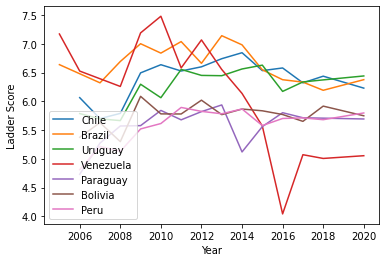

In [18]:
countries_of_interest = ['Chile', 'Brazil', 'Uruguay', 'Venezuela', 'Paraguay', 'Bolivia', 'Peru']

for country in countries_of_interest:
  y = df_merge[df_merge['Country name'] == country]['Ladder score']
  x = df_merge[df_merge['Country name'] == country]['Year']
  label = country
  plt.plot(x, y, label = label)

plt.xlabel('Year')
plt.ylabel('Ladder Score')
plt.legend(loc='lower left')
plt.show()

Regression

In [19]:
south_america_regression = south_america.dropna()
south_america_regression_2020 = south_america_regression[south_america_regression['Year'] == 2020]
print(len(south_america))
print(len(south_america_regression))
print(len(south_america_regression_2020))

141
136
10


In [20]:
#bivariate regression ladder score and GDP per capita

X = south_america_regression['Logged GDP per capita']
Y = south_america_regression['Ladder score']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     74.27
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.68e-14
Time:                        02:29:07   Log-Likelihood:                -80.272
No. Observations:                 136   AIC:                             164.5
Df Residuals:                     134   BIC:                             170.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.51

In [21]:
#multivariate regression

X = south_america_regression[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = south_america_regression['Ladder score']

X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
print_model_2 = model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     39.16
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           8.12e-27
Time:                        02:29:07   Log-Likelihood:                -39.726
No. Observations:                 136   AIC:                             93.45
Df Residuals:                     129   BIC:                             113.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#World data analysis

Relationship between ladder score and other variables

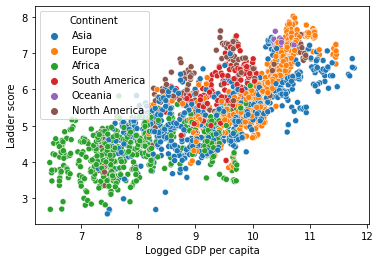

In [22]:
sns.scatterplot(x = 'Logged GDP per capita', y = 'Ladder score', hue = 'Continent', data = df_merge)

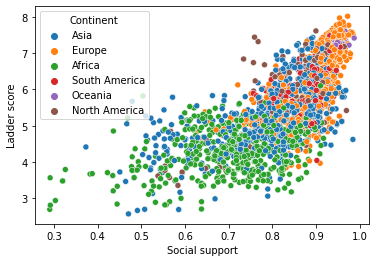

In [23]:
sns.scatterplot(x = 'Social support', y = 'Ladder score', hue = 'Continent', data = df_merge)

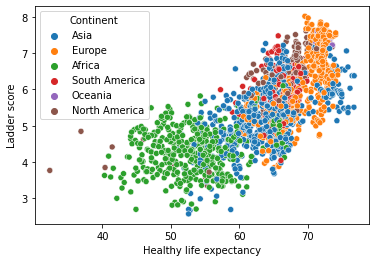

In [24]:
sns.scatterplot(x = 'Healthy life expectancy', y = 'Ladder score', hue = 'Continent', data = df_merge)

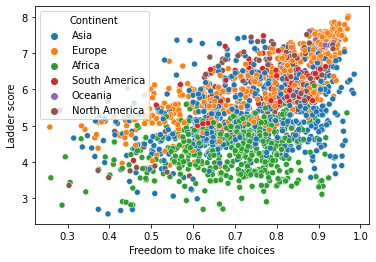

In [25]:
sns.scatterplot(x = 'Freedom to make life choices', y = 'Ladder score', hue = 'Continent', data = df_merge)

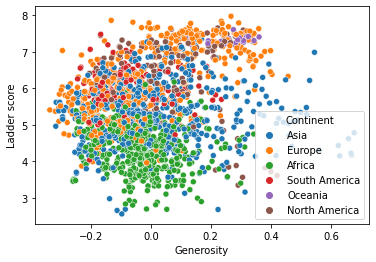

In [26]:
sns.scatterplot(x = 'Generosity', y = 'Ladder score', hue = 'Continent', data = df_merge)

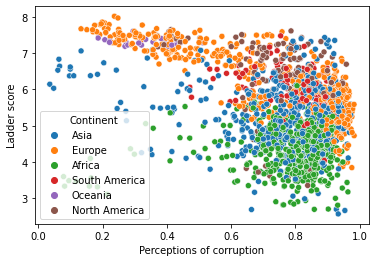

In [27]:
sns.scatterplot(x = 'Perceptions of corruption', y = 'Ladder score', hue = 'Continent', data = df_merge)